In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Project/AI_Human.csv")

In [3]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [5]:
df['generated'].value_counts()

0.0    305797
1.0    181438
Name: generated, dtype: int64

In [6]:
print('Total Texts:', df['generated'].count())
print('Human Written Texts:', (df['generated'] == 0.0).sum())
print('AI Generated Texts:', (df['generated'] == 1.0).sum())

Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


In [11]:
df['generated_cor'] = df['generated'].replace({
    0: 'Human',
    1: 'AI'
})

In [12]:
df.head()

,text,generated,generated_cor
0,Cars. Cars have been around since they became ...,0.0,Human
1,Transportation is a large necessity in most co...,0.0,Human
2,"""America's love affair with it's vehicles seem...",0.0,Human
3,How often do you ride in a car? Do you drive a...,0.0,Human
4,Cars are a wonderful thing. They are perhaps o...,0.0,Human


<Axes: xlabel='generated_cor', ylabel='count'>

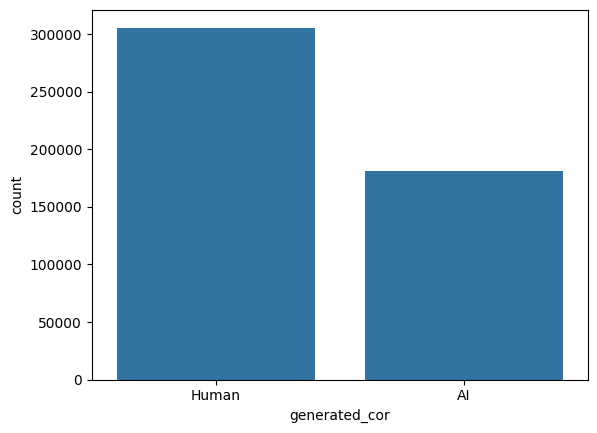

In [13]:
sns.countplot(data=df, x="generated_cor")

In [14]:
df["text"][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [15]:
def remove_tags(text):
  tags = ["\n", "\""]
  for tag in tags:
    text = text.replace(tag, "")

  return text

In [16]:
df["text"] = df["text"].apply(remove_tags)

In [17]:
df["text"][0]

"Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.In like matter of this, article, In German Suburb, Life Goes On Without Cars, by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, Pari

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def remove_punctuation(texts):
  new_text = [text for text in texts if text not in string.punctuation]
  new_text = "".join(new_text)
  return new_text


In [20]:
df["text"] = df["text"].apply(remove_punctuation)

In [21]:
df["text"][0]

'Cars Cars have been around since they became famous in the 1900s when Henry Ford created and built the first ModelT Cars have played a major role in our every day lives since then But now people are starting to question if limiting car usage would be a good thing To me limiting the use of cars might be a good thing to doIn like matter of this article In German Suburb Life Goes On Without Cars by Elizabeth Rosenthal states how automobiles are the linchpin of suburbs where middle class families from either Shanghai or Chicago tend to make their homes Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europeand up to 50 percent in some carintensive areas in the United States Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go Article Paris bans driving due to 

In [22]:
import nltk

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words= ' '.join(filtered_words)
    return filtered_words

In [25]:
df["text"] = df["text"].apply(remove_stopwords)

In [26]:
df["text"][0]

'Cars Cars around since became famous 1900s Henry Ford created built first ModelT Cars played major role every day lives since people starting question limiting car usage would good thing limiting use cars might good thing doIn like matter article German Suburb Life Goes Without Cars Elizabeth Rosenthal states automobiles linchpin suburbs middle class families either Shanghai Chicago tend make homes Experts say huge impediment current efforts reduce greenhouse gas emissions tailpipe Passenger cars responsible 12 percent greenhouse gas emissions Europeand 50 percent carintensive areas United States Cars main reason greenhouse gas emissions lot people driving around time getting need go Article Paris bans driving due smog Robert Duffer says Paris days nearrecord pollution enforced partial driving ban clear air global city also says Monday motorist evennumbered license plates ordered leave cars home fined 22euro fine 31 order would applied oddnumbered plates following day Cars reason poll

In [27]:
def lower_case(text):
  text = text.lower()
  return text

In [28]:
df["text"] = df["text"].apply(lower_case)

In [29]:
df["text"][0]

'cars cars around since became famous 1900s henry ford created built first modelt cars played major role every day lives since people starting question limiting car usage would good thing limiting use cars might good thing doin like matter article german suburb life goes without cars elizabeth rosenthal states automobiles linchpin suburbs middle class families either shanghai chicago tend make homes experts say huge impediment current efforts reduce greenhouse gas emissions tailpipe passenger cars responsible 12 percent greenhouse gas emissions europeand 50 percent carintensive areas united states cars main reason greenhouse gas emissions lot people driving around time getting need go article paris bans driving due smog robert duffer says paris days nearrecord pollution enforced partial driving ban clear air global city also says monday motorist evennumbered license plates ordered leave cars home fined 22euro fine 31 order would applied oddnumbered plates following day cars reason poll

#Splitting the Dataset

In [30]:
y=df['generated_cor']
X=df['text']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
print(len(X_train))
print(len(X_test))

341064
146171


In [33]:
y_train.value_counts()

Human    214200
AI       126864
Name: generated_cor, dtype: int64

In [34]:
y_test.value_counts()

Human    91597
AI       54574
Name: generated_cor, dtype: int64

##Pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import SVC, LinearSVC

In [36]:
pipelineMNB = Pipeline([
    ('count_vectorizer', CountVectorizer(stop_words='english')),  # Step 1: CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # Step 2: TF-IDF Transformer
    ('naive_bayes', MultinomialNB())])

In [38]:
pipelineCNB = Pipeline([
    ('count_vectorizer', CountVectorizer(stop_words='english')),  # Step 1: CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # Step 2: TF-IDF Transformer
    ('Complement_Naive_Bayes', ComplementNB())])

In [39]:
pipelineSVC = Pipeline([
    ('count_vectorizer', CountVectorizer(stop_words='english')),  # Step 1: CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # Step 2: TF-IDF Transformer
    ('Linear SVC', LinearSVC())])

In [40]:
pipelineMNB.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('naive_bayes', MultinomialNB())])

In [41]:
pipelineCNB.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer(stop_words='english')),
                ('tfidf_transformer', TfidfTransformer()),
                ('Complement_Naive_Bayes', ComplementNB())])

In [42]:
pipelineSVC.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer(stop_words='english')),
                ('tfidf_transformer', TfidfTransformer()),
                ('Linear SVC', LinearSVC())])

In [43]:
y_pred_MNB = pipelineMNB.predict(X_test)

In [44]:
y_pred_CNB = pipelineCNB.predict(X_test)

In [45]:
y_pred_SVC = pipelineSVC.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
mnb = accuracy_score(y_test, y_pred_MNB)
cnb = accuracy_score(y_test, y_pred_CNB)
svc = accuracy_score(y_test, y_pred_SVC)

In [48]:
print(f"MNB: {mnb*100:.2f}%")
print(f"CNB: {cnb*100:.2f}%")
print(f"SVC: {svc*100:.2f}%")

MNB: 95.45%
CNB: 96.19%
SVC: 99.83%


In [49]:
from sklearn.metrics import classification_report

In [50]:
print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_MNB))
print("\nClassification Report for Complement Naive Bayes:")
print(classification_report(y_test, y_pred_CNB))
print("\nClassification Report for Support Vector Classifier:")
print(classification_report(y_test, y_pred_SVC))

Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

          AI       0.98      0.89      0.94     54574
       Human       0.94      0.99      0.96     91597

    accuracy                           0.95    146171
   macro avg       0.96      0.94      0.95    146171
weighted avg       0.96      0.95      0.95    146171


Classification Report for Complement Naive Bayes:
              precision    recall  f1-score   support

          AI       0.97      0.92      0.95     54574
       Human       0.96      0.98      0.97     91597

    accuracy                           0.96    146171
   macro avg       0.96      0.95      0.96    146171
weighted avg       0.96      0.96      0.96    146171


Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

          AI       1.00      1.00      1.00     54574
       Human       1.00      1.00      1.00     91597

    accuracy              

In [ ]:
import joblib
joblib.dump(pipeline, '/content/drive/MyDrive/Project/model.pkl')

['/content/drive/MyDrive/Project/model.pkl']

In [60]:
generated_text = ["""I do jogging and physical exercise which I would call my hobby. I like it because it’s nice and always makes me feel good afterwards. It’s a great way to stay fit and make use of some extra time I have. It’s a very common type of sport for many people and it’s no wonder because it’s basically simple and easy to start. All you need is some energy, motivation, a pair of sport shoes and trousers that have some flexibility. Also a little extra money in case you would like to go in to some sports center or gym.


It also increases your health especially if you do it regularly and it’s very enjoyable to see the good results that it gives to your physical condition. Also one really great thing about it – which is probably as well one of the reasons to it’s popularity –  is that you can do it whenever you have time to and you don´t have to make a schedule for it if you dont want to. You can spontaniously just go for it whenever you feel like it on your spare time. This makes it the perfect way for me to stay fit."""]

In [61]:
predicted_text_MNB = pipelineMNB.predict(generated_text)
predicted_text_CNB = pipelineCNB.predict(generated_text)
predicted_text_SVC = pipelineSVC.predict(generated_text)

In [62]:
print(predicted_text_MNB[0])
print(predicted_text_CNB[0])
print(predicted_text_SVC[0])

AI
Human
Human


In [57]:
generated_text = ["""AI has been disrupting content writing by revolutionizing the way content is created, personalized, and optimized. Through the use of advanced natural language processing (NLP) techniques and machine learning algorithms, AI-powered tools are transforming the content creation process in various ways.
One significant impact of AI on content writing is the automation of routine tasks such as generating product descriptions, news articles, and social media posts. AI-powered content generation tools can produce high-quality, human-like content at scale, saving time and resources for businesses and content creators. These tools can analyze data trends, user behavior, and preferences to tailor content to specific audiences, leading to more engaging and relevant material.
Moreover, AI is enabling personalized content experiences through techniques like content recommendation systems and dynamic content generation. By analyzing user interactions and preferences, AI algorithms can deliver personalized recommendations and create customized content based on individual user profiles. This level of personalization enhances user engagement and satisfaction, ultimately driving better conversion rates and customer loyalty.
AI is also optimizing content for search engines through techniques like natural language processing, sentiment analysis, and keyword optimization. AI-powered tools can analyze vast amounts of data to identify relevant keywords, improve readability, and enhance SEO performance. By leveraging AI in content writing, businesses can increase their online visibility and reach a wider audience effectively.
However, while AI offers numerous benefits in content writing, it also raises concerns about job displacement and ethical considerations. As AI becomes more proficient in generating content indistinguishable from human-written material, there is a growing debate about the implications for professional writers and the authenticity of AI-generated content. Additionally, ethical considerations around bias in AI algorithms and the potential misuse of automated content creation tools require careful monitoring and regulation.
In conclusion, AI is disrupting content writing by streamlining processes, enabling personalization, and optimizing performance. While the impact of AI on content creation is undeniable, it is essential for businesses and creators to leverage these technologies responsibly while upholding ethical standards to ensure a balance between efficiency and authenticity in the digital age."""]

In [58]:
predicted_text_MNB = pipelineMNB.predict(generated_text)
predicted_text_CNB = pipelineCNB.predict(generated_text)
predicted_text_SVC = pipelineSVC.predict(generated_text)

In [59]:
print(predicted_text_MNB[0])
print(predicted_text_CNB[0])
print(predicted_text_SVC[0])

AI
AI
AI


In [63]:
text = ["""Gender issues have been increasing in importance through the centuries. In almost every sphere of human activity, there has been a movement towards greater equality between men and women. Although I agree that universities should open their doors to all students alike, in my view, they need not set a fixed limit on the number of men and women they accept in each subject. The bases for my views are psychological and personal.

Psychologically-speaking, men and women are simply different, though they have the same potential for greatness. For example, women tend to be more intuitive, sensitive to others and caring. This means they may feel drawn, on the basis of their personalities, to certain kinds of professions such as teaching, nursing, or psychology, even if all fields are open to them. In such a context, it is best for universities to choose the best applicants, regardless of gender.

Personally, students need to discover their true calling. This is an individual matter and is not influenced by the universities reserving seats for men or women. For example, if the majority of women shy away from math or engineering, perhaps it has to do with their upbringing, which has influenced their interests. The universities will not be able to reverse this trend, though they should always look out for the most qualified candidates.

In conclusion, equality cannot be forced upon people – not in the area of education, employment or family life. Equality is about having choices and those who prove themselves capable will qualify for university, regardless of gender. It is only right that universities reflect and respect these free and natural choices being exercised by their students."""]

In [64]:
predicted_text_MNB = pipelineMNB.predict(text)
predicted_text_CNB = pipelineCNB.predict(text)
predicted_text_SVC = pipelineSVC.predict(text)

In [65]:
print(predicted_text_MNB[0])
print(predicted_text_CNB[0])
print(predicted_text_SVC[0])

AI
AI
AI


In [66]:
df_test = pd.read_csv("/content/drive/MyDrive/Project/daigt_external_dataset.csv")

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2421 non-null   object
 1   text          2421 non-null   object
 2   instructions  2421 non-null   object
 3   source_text   2421 non-null   object
dtypes: object(4)
memory usage: 75.8+ KB


In [74]:
new_data = {
    'text': df_test['text'].append(df_test['source_text'], ignore_index=True),
    'generated_cor': ["Human"]*len(df_test) + ["AI"]*len(df_test)
}
new_df = pd.DataFrame(new_data)

print(new_df)

                                                   text generated_cor
0     Some schools in United States ofter classes fr...         Human
1     Four-day work week, a remarkable idea to conse...         Human
2     Students and their families should consider an...         Human
3     Agree you will never grow if something beyond ...         Human
4     I think our character traits are formed by inf...         Human
...                                                 ...           ...
4837  \nBecoming a surgeon requires a great deal of ...            AI
4838  \nSchools should offer an after school homewor...            AI
4839  \nIt’s human nature to be afraid to make mista...            AI
4840  \nOne of the main debates of 2020 for many stu...            AI
4841  \nThe implementation of a curfew for teenagers...            AI

[4842 rows x 2 columns]


<ipython-input-74-c127ae7fde35>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  'text': df_test['text'].append(df_test['source_text'], ignore_index=True),


In [80]:
new_df["generated_cor"].value_counts()

Human    2421
AI       2421
Name: generated_cor, dtype: int64

In [83]:
y_val=new_df['generated_cor']
X_val=new_df['text']

In [84]:
y_val_MNB = pipelineMNB.predict(X_val)

In [85]:
y_val_CNB = pipelineCNB.predict(X_val)

In [86]:
y_val_SVC = pipelineSVC.predict(X_val)

In [87]:
mnb_val = accuracy_score(y_val, y_val_MNB)
cnb_val = accuracy_score(y_val, y_val_CNB)
svc_val = accuracy_score(y_val, y_val_SVC)

In [88]:
print(f"MNB: {mnb_val*100:.2f}%")
print(f"CNB: {cnb_val*100:.2f}%")
print(f"SVC: {svc_val*100:.2f}%")

MNB: 50.00%
CNB: 93.87%
SVC: 99.69%


In [89]:
import joblib
joblib.dump(pipelineMNB, '/content/drive/MyDrive/Project/model_MNB.pkl')
joblib.dump(pipelineCNB, '/content/drive/MyDrive/Project/model_CNB.pkl')
joblib.dump(pipelineSVC, '/content/drive/MyDrive/Project/model_SVC.pkl')

['/content/drive/MyDrive/Project/model_SVC.pkl']

In [93]:
new_df["text"][2010]

'Only topic that is frequenthy is debate today is whether or not conserve energy and resouces since some business have adopted a four-day work week, with each day consisting of ten hours. Should your school follow this model by extending the school day two hours? Some peolpe think that not only extending the school day should conserve energy and resource. They feel that is the same thing and also too that is more time in the school in addiction that they will spent more money in energy like electricity, ligths , charge to computers ,blackboard electric and the more things, an resource that should spent more is the water because some students when go to the bathroom they forget closed the washstand. I believe that should follow this model by extending the school day two hours because should be take care about of how to conserve energy, resources and the last but not the least is we will have more time for make a the world better and take consience.\n\nOne reason i believe why that shoul

In [97]:
text = ["""Technology has a lot of the positive and negative side to it. In the positive side technology comes in handy a lot you can shop online , pay a lot of your bills online and do a whole lot. In the negative side you loose contacts with humans cause every person abuses technology , people always on their phones , people losing eye to eye conversion with each other.

technology will always have a good or bad side in way how humans use it.

In the positive way of technology , a lot people use technology to shop online , a lot of times people try to find the products that he or she wants to find in the store and its to expensive to buy in store , people find it more cheaper products online than outlet stores. Not only people shop online, people also use technology to buy programs that colleges recamend them to use. It helps a lot of people that are in college that do a lot of homework a lot teachers assign homework online than paper. technology always advance everyday in a good way to enjoy. A lot of high school students use technology to do homework for a class that the students miss that day he or she was absent.

technology keeps everyone in check and organized. But yet even if theres a lot of positive stuff about it ,

there's a lot negative things about technology.

In the negative part of technology ,

a lot people thats on their phone ignores the person that he or she was having a conversation with.

The main big problem right now is that people are abusing technology by texting and driving while using their phones , a lot of people are getting distracted on the road cause they want to answer their text message but most of the time people that answer gets into a car crash for getting distracted.

Theres always gonna be a bad and good ways about technology it all depends how humans use technology.

The way I see people using technology its good cause it a lot easier to organize important documents , shop online , doing homework for school and everyday technology will always advance each day.

The only problem thats bad about technology its that us humans getting distracted easily by using our phones , playing games on console , and getting distracted easily. Theres always gonna be a bad and good towards technology it all the depends how humans use it.

Technology is the best thing we have in our world. It makes life more easier for us to do stuff online. Technology will be there for us when we need it to organize documents , buy stuff online , and it will always advance. technology will always have a positive and negative side to it but most of the time its positive. it all depend how humans use it. thats what I think about my side technology the bad and the good.                            """]
predicted_text_MNB = pipelineMNB.predict(text)
predicted_text_CNB = pipelineCNB.predict(text)
predicted_text_SVC = pipelineSVC.predict(text)
print(predicted_text_MNB[0])
print(predicted_text_CNB[0])
print(predicted_text_SVC[0])


AI
Human
Human
